In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
x = data.iloc[:,[2,3]].values
y = data.iloc[:,4].values

In [5]:
print(x[:3,:])
print('-'*15)
print(y[:3])

[[   19 19000]
 [   35 20000]
 [   26 43000]]
---------------
[0 0 0]


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
print(x_train[:3])
print('-'*15)
print(y_train[:3])
print('-'*15)
print(x_test[:3])
print('-'*15)
print(y_test[:3])

[[    44  39000]
 [    32 120000]
 [    38  50000]]
---------------
[0 1 0]
---------------
[[   30 87000]
 [   38 50000]
 [   35 75000]]
---------------
[0 0 0]


In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)

In [8]:
print(x_train[:3])
print('-'*15)
print(x_test[:3])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]]
---------------
[[-0.54748976  0.5130727 ]
 [ 0.15442019 -0.61825566]
 [-0.10879604  0.14615539]]


In [10]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0,solver = 'lbfgs')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(x_test[:10])
print('-'*15)
print(y_pred[:10])

[[-0.54748976  0.5130727 ]
 [ 0.15442019 -0.61825566]
 [-0.10879604  0.14615539]
 [-0.54748976  0.26846116]
 [-0.10879604 -0.61825566]
 [-0.81070599 -1.53554892]
 [-0.45975102 -1.68843113]
 [-0.0210573   2.25592989]
 [-1.60035469 -0.0678797 ]
 [ 0.94406888 -0.83229075]]
---------------
[0 0 0 0 0 0 0 1 0 1]


In [12]:
print(y_pred[:20])
print(y_test[:20])

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]


In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[63  5]
 [ 8 24]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


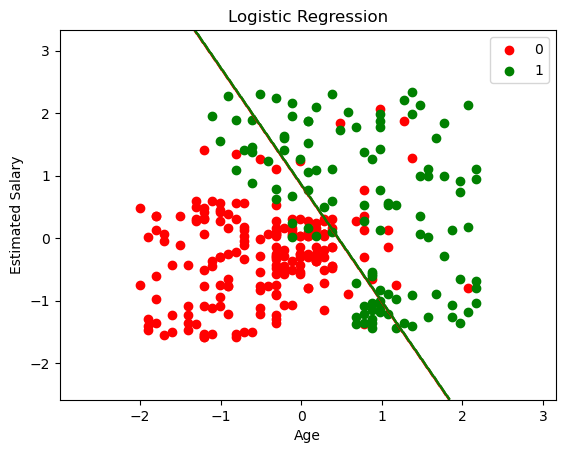

In [16]:
import numpy as np
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop = x_set[:,0].max() +1, step = 0.01),
                    np.arange(start = x_set[:,1].min() -1, stop = x_set[:,1].max() +1, step = 0.01))
plt.contour(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.6, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
               c = ListedColormap (('red', 'green'))(i), label = j)
plt.title('Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()